# CODE TO BUILD A SIMPLE PERCEPTRON 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# example making new class predictions for a classification problem
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


speed_data = pd.read_csv("speed_decision_data.csv")

In [ ]:
speed_data.head()

1 - Distance From Bump  Height of Bump  Speed
0                0.575374        0.680337      0
1                0.376002        0.278661      1
2                0.973890        0.741585      0
3                0.310378        0.342374      1
4                0.109521        0.268304      1

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1 - Distance From Bump', ylabel='Height of Bump'>

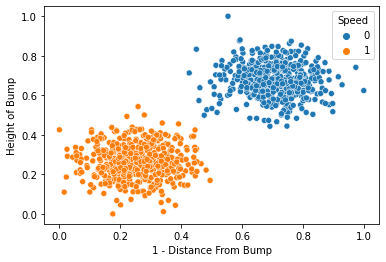

In [ ]:
sns.scatterplot(speed_data['1 - Distance From Bump'], speed_data['Height of Bump'], hue = speed_data['Speed'])

In [ ]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]

In [ ]:
y_train = speed_data['Speed']

In [ ]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100, verbose=2)



Epoch 1/100
32/32 - 2s - loss: 0.8501
Epoch 2/100
32/32 - 0s - loss: 0.8360
Epoch 3/100
32/32 - 0s - loss: 0.8233
Epoch 4/100
32/32 - 0s - loss: 0.8120
Epoch 5/100
32/32 - 0s - loss: 0.8013
Epoch 6/100
32/32 - 0s - loss: 0.7918
Epoch 7/100
32/32 - 0s - loss: 0.7832
Epoch 8/100
32/32 - 0s - loss: 0.7751
Epoch 9/100
32/32 - 0s - loss: 0.7676
Epoch 10/100
32/32 - 0s - loss: 0.7608
Epoch 11/100
32/32 - 0s - loss: 0.7541
Epoch 12/100
32/32 - 0s - loss: 0.7478
Epoch 13/100
32/32 - 0s - loss: 0.7419
Epoch 14/100
32/32 - 0s - loss: 0.7364
Epoch 15/100
32/32 - 0s - loss: 0.7312
Epoch 16/100
32/32 - 0s - loss: 0.7260
Epoch 17/100
32/32 - 0s - loss: 0.7211
Epoch 18/100
32/32 - 0s - loss: 0.7163
Epoch 19/100
32/32 - 0s - loss: 0.7116
Epoch 20/100
32/32 - 0s - loss: 0.7069
Epoch 21/100
32/32 - 0s - loss: 0.7024
Epoch 22/100
32/32 - 0s - loss: 0.6980
Epoch 23/100
32/32 - 0s - loss: 0.6936
Epoch 24/100
32/32 - 0s - loss: 0.6892
Epoch 25/100
32/32 - 0s - loss: 0.6849
Epoch 26/100
32/32 - 0s - loss: 0.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# make a prediction
# Pre-Tensorflow 2.6 code:
#y_train_predict = model.predict_classes(X_train) 

# The new way to do it for binary classification, now that predict_classes is gone:
y_train_predict = (model.predict(X_train) > 0.5).astype("int32")


<AxesSubplot:>

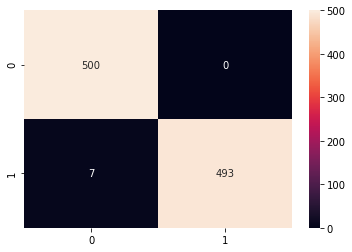

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


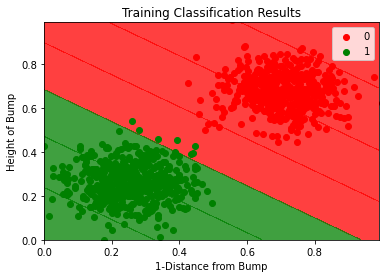

In [ ]:
# https://medium.com/coinmonks/predicting-product-sales-through-ads-delivered-on-social-networking-sites-using-k-n-n-in-python-b9f955d184af


# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train.values, y_train.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

In [ ]:
weights, biases = model.layers[0].get_weights()

In [ ]:
weights

array([[-1.3864766],
       [-1.8993982]], dtype=float32)

In [ ]:
biases

array([1.298875], dtype=float32)